In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
import pandas as pd
import pyreadr as pyr
pd.set_option('display.max_rows',None)

In [2]:
ls ../output

40000_by_50_left_singular_vecs.csv
40000_by_50_point_laplace_backfit_FALSE_L.csv
40000_by_50_point_laplace_backfit_FALSE_data.RData
40000_by_50_point_laplace_backfit_FALSE_words.csv
40000_by_50_point_normal_backfit_FALSE_L.csv
40000_by_50_point_normal_backfit_FALSE_data.RData
40000_by_50_point_normal_backfit_FALSE_words.csv
40000_by_50_right_singular_vecs.csv
40000_by_50_singular_values.csv
40000_by_50_words.csv
README.md


In [3]:
def plot_loadings(L):
    f, ax = plt.subplots(figsize=(25,7))
    _max = max(abs(np.min(L)),abs(np.max(L)))
    p = ax.imshow(L,aspect="auto",interpolation='nearest',cmap="seismic",vmax=_max,vmin=-_max)
    plt.colorbar(p,ax=ax)
    return ax

In [4]:
def print_extreme_words(L,words,n=50):
    #print list of n most extreme words in each factor
    for k in range(L.shape[1]):
        print("k =",k)
        idx = np.argsort(L[:,k])
        d = pd.DataFrame(data={
            "lowest words":words[idx][:n],
            "lowest value":L[idx,k][:n],
            "highest words":words[idx][-n:][::-1],
            "highest value":L[idx,k][-n:][::-1]
                          }
                    )
        display(d)

In [5]:
def get_filenames(dim,truncatenum,prior,backfit = False):
    matrixfile = f"../output/{truncatenum}_by_{dim}_{prior}_backfit_{str(backfit).upper()}_L.csv"
    wordsfile = f"../output/{truncatenum}_by_{dim}_words.csv"
    return matrixfile,wordsfile

In [6]:
def view_results(matrixfile,wordsfile,n=50,k=10):
    #read in data
    L = np.genfromtxt(matrixfile)[:,:k]
    words = np.genfromtxt(wordsfile,dtype=str,comments=None)
    print(L.shape)
    print(words.shape)
    #make plot
    plt.show(plot_loadings(L))
    #print list of n most extreme words in each factor
    print_extreme_words(L,words,n)
    #return L and words
    return L,words

(40000, 10)
(40000,)


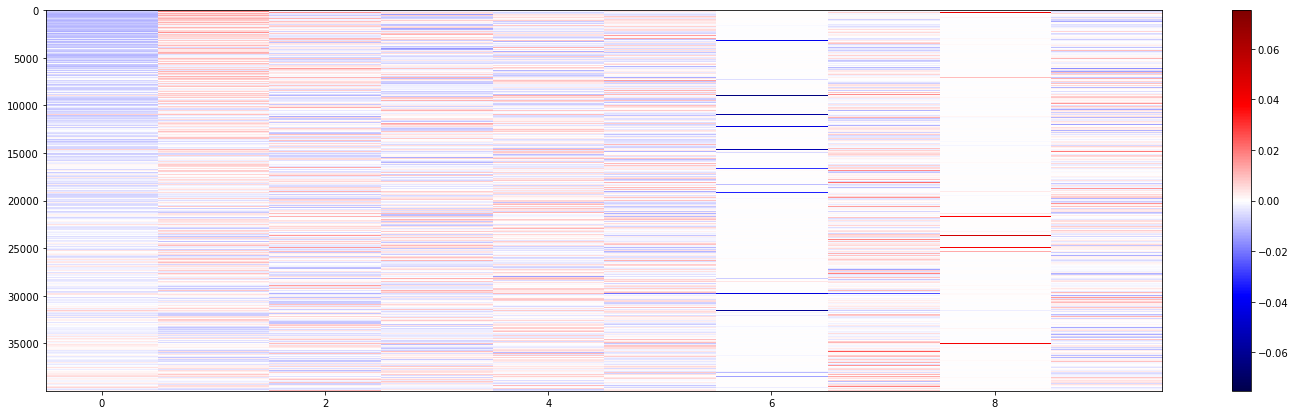

k = 0


,lowest words,lowest value,highest words,highest value
0,more,-0.016811,20003,0.010941
1,their,-0.016663,dehr,0.009733
2,some,-0.016440,vih,0.009484
3,these,-0.016380,wuh,0.009414
4,any,-0.016283,202-887-8307,0.009352
5,they,-0.016155,pehr,0.008952
6,are,-0.016056,jih,0.008718
7,have,-0.016036,kur,0.008590
8,countries,-0.016017,suhn,0.008582
9,our,-0.015993,puh,0.008225


k = 1


,lowest words,lowest value,highest words,highest value
0,282-942,-0.014933,minister,0.020155
1,http://www.nasdaq.com,-0.014742,former,0.018647
2,herein,-0.014334,leader,0.018501
3,microscopic,-0.012987,secretary,0.018165
4,hushen,-0.012556,president,0.018038
5,coating,-0.012400,deputy,0.017808
6,droplets,-0.012318,chief,0.017281
7,coatings,-0.012300,chairman,0.016976
8,organisms,-0.012168,told,0.016947
9,polymers,-0.012166,appointed,0.016885


k = 2


,lowest words,lowest value,highest words,highest value
0,mehn,-0.017806,cents,0.021027
1,yahng,-0.015786,cac-40,0.019650
2,vah,-0.015168,1/4,0.019049
3,kaht,-0.014981,km,0.018922
4,meddling,-0.014511,bushel,0.018388
5,discredit,-0.014494,gallon,0.018365
6,condone,-0.013849,3/4,0.018060
7,voh,-0.013624,stoxx,0.017383
8,heinous,-0.013135,0.9,0.017121
9,rahk,-0.013135,1/8,0.017058


k = 3


,lowest words,lowest value,highest words,highest value
0,732-390-4480,-0.018210,arbil,0.016808
1,guitar,-0.017467,pkk,0.016167
2,732-390-4697,-0.017410,kyrgyzstan,0.015426
3,funny,-0.016024,burundian,0.015412
4,vocals,-0.015908,puntland,0.015403
5,piano,-0.015860,tajik,0.015390
6,guy,-0.015807,dushanbe,0.015320
7,matt,-0.015330,nagorno,0.015298
8,andy,-0.015161,eritrean,0.015289
9,comedy,-0.015057,stah,0.015154


k = 4


,lowest words,lowest value,highest words,highest value
0,212-556-4204,-0.026367,nahn,0.028950
1,404-526-5456,-0.022917,vah,0.022049
2,202-383-7824,-0.022110,rih,0.019153
3,nonsubscribers,-0.021139,rained,0.018192
4,http://www.nyse.com,-0.018909,dool,0.017981
5,202-887-8316,-0.018828,zuh,0.017666
6,zacks,-0.018779,nahr,0.017630
7,ieee,-0.018188,pounded,0.017556
8,peer-reviewed,-0.017418,torrential,0.016698
9,research,-0.016427,streaked,0.016668


k = 5


,lowest words,lowest value,highest words,highest value
0,shoh,-0.021648,located,0.018754
1,bahd,-0.020741,cemetery,0.018508
2,zah,-0.017924,noctuidae,0.018458
3,non-families,-0.017505,village,0.018020
4,1min,-0.017440,ancient,0.017818
5,yahn,-0.016315,medieval,0.017718
6,deficit,-0.016311,chapel,0.017167
7,earnings,-0.016150,parish,0.017115
8,http://www.nasdaq.com,-0.015769,temples,0.017009
9,hahr,-0.015348,47-42-17-11,0.016971


k = 6


,lowest words,lowest value,highest words,highest value
0,hahm,-0.075286,worldsources,0.050702
1,yahd,-0.073968,tduncan,0.035976
2,zah,-0.073232,podlaskie,0.034191
3,lah,-0.071546,non-swiss,0.028333
4,meel,-0.071483,kuyavian-pomeranian,0.027248
5,luh,-0.071291,householder,0.025339
6,ehn,-0.070914,łódź,0.024151
7,brah,-0.070696,arctiidae,0.020533
8,eed,-0.070655,east-central,0.020330
9,grah,-0.070319,816-822-1444,0.020075


k = 7


,lowest words,lowest value,highest words,highest value
0,fdch,-0.029546,sanskrit,0.030175
1,404-526-5456,-0.029527,verb,0.027927
2,kih,-0.026788,noun,0.027331
3,shoh,-0.026174,syllable,0.027119
4,sih,-0.025585,nouns,0.026875
5,grah,-0.024806,verbs,0.026656
6,tih,-0.023776,uml,0.026546
7,20003,-0.021027,rna,0.026364
8,uninsured,-0.021019,algebra,0.026083
9,zeez,-0.020763,λ,0.025725


k = 8


,lowest words,lowest value,highest words,highest value
0,nonsubscribers,-0.031061,816-822-8448,0.061028
1,unscom,-0.027172,householder,0.058808
2,telegram.com,-0.025944,0.23,0.052263
3,www.star,-0.024053,0.11,0.052046
4,globe.com,-0.021603,0.19,0.052028
5,masovian,-0.020926,topix,0.051831
6,play-offs,-0.020264,0.21,0.051822
7,rodong,-0.019282,0.31,0.051783
8,reactor,-0.018092,0.17,0.051776
9,pcb,-0.017999,0.14,0.051691


k = 9


,lowest words,lowest value,highest words,highest value
0,ammonium,-0.027635,http://www.nyse.com,0.034062
1,sarin,-0.027487,bihn,0.033427
2,202-887-8334,-0.025276,mahk,0.031577
3,melamine,-0.025036,dehl,0.029628
4,explosives,-0.023585,hahr,0.027550
5,fertilizer,-0.023244,winless,0.025562
6,qadeer,-0.023036,http://www.nytimes.com,0.025053
7,potassium,-0.022831,dehr,0.024525
8,detonators,-0.022791,tuh,0.023736
9,chemicals,-0.022373,www.star,0.023629


In [8]:
matrixfile,wordsfile = get_filenames(dim=50,truncatenum=40000,prior="point_normal")
Lpn,Wpn = view_results(matrixfile,wordsfile,n=10)

(40000, 10)
(40000,)


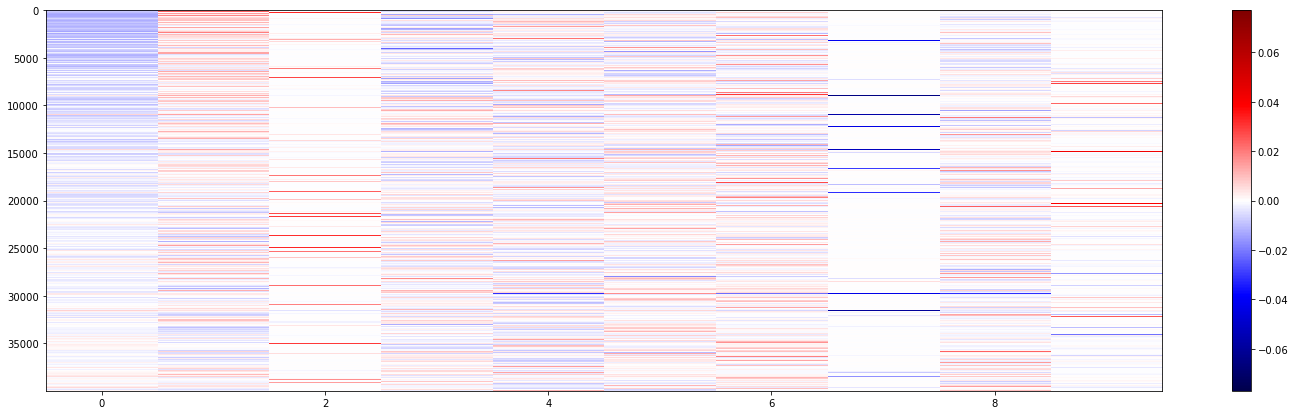

k = 0


,lowest words,lowest value,highest words,highest value
0,more,-0.019475,20003,0.011090
1,their,-0.019282,vih,0.010106
2,some,-0.018946,dehr,0.009985
3,any,-0.018851,wuh,0.009614
4,these,-0.018803,202-887-8307,0.009168
5,they,-0.018725,pehr,0.008881
6,have,-0.018615,suhn,0.008658
7,countries,-0.018593,kur,0.008579
8,we,-0.018490,jih,0.008566
9,are,-0.018470,zahr,0.008251


k = 1


,lowest words,lowest value,highest words,highest value
0,282-942,-0.020299,minister,0.031029
1,herein,-0.018979,leader,0.026903
2,microscopic,-0.016960,president,0.025355
3,212-556-4204,-0.016750,secretary,0.025106
4,thickness,-0.016655,deputy,0.024799
5,http://www.nasdaq.com,-0.016365,former,0.023733
6,coating,-0.015969,gen.,0.023270
7,crustaceans,-0.015964,ambassador,0.022932
8,coatings,-0.015469,prime,0.022768
9,spherical,-0.015407,ousted,0.022766


k = 2


,lowest words,lowest value,highest words,highest value
0,nonsubscribers,-0.019171,cents,0.037295
1,vah,-0.018669,billion,0.035698
2,discredit,-0.014279,percent,0.034705
3,ehl,-0.013001,1.09,0.034678
4,plame,-0.012314,pesos,0.034334
5,kaht,-0.011738,1.07,0.034279
6,mahs,-0.011439,0.8,0.034133
7,embarrass,-0.009704,1.02,0.033929
8,mahm,-0.009642,1.08,0.033923
9,guh,-0.009524,1.22,0.033835


k = 3


,lowest words,lowest value,highest words,highest value
0,732-390-4697,-0.027293,stah,0.023906
1,732-390-4480,-0.025673,nagorno,0.020260
2,jeff,-0.024524,bahs,0.019563
3,matt,-0.024068,kurds,0.019339
4,steve,-0.023980,pkk,0.019333
5,andy,-0.023941,eritrean,0.019176
6,williams,-0.023710,kurdish,0.019019
7,season,-0.023652,hutu,0.018792
8,scott,-0.023423,republika,0.018732
9,game,-0.023354,pna,0.018305


k = 4


,lowest words,lowest value,highest words,highest value
0,shoh,-0.031466,located,0.035864
1,rahk,-0.024395,railway,0.030897
2,bihn,-0.024004,situated,0.028887
3,voh,-0.021749,river,0.028657
4,yahn,-0.020695,coastal,0.027866
5,yahng,-0.020663,governorate,0.026059
6,remorse,-0.017589,municipality,0.026029
7,householder,-0.017385,basin,0.025351
8,thoughtful,-0.017347,oblast,0.025350
9,candid,-0.017260,northeast,0.025201


k = 5


,lowest words,lowest value,highest words,highest value
0,212-556-4204,-0.038558,nahn,0.049242
1,202-383-7824,-0.034815,vah,0.030707
2,404-526-5456,-0.032710,rained,0.027332
3,nonsubscribers,-0.029038,dool,0.027059
4,http://www.nyse.com,-0.027430,rih,0.025513
5,ieee,-0.026725,pounded,0.025467
6,202-887-8316,-0.025533,streaked,0.025196
7,not-for-profit,-0.025498,zuh,0.025134
8,zacks,-0.024654,tear,0.024510
9,peer-reviewed,-0.024465,batons,0.024470


k = 6


,lowest words,lowest value,highest words,highest value
0,grah,-0.031586,sanskrit,0.038061
1,worldsources,-0.026488,hymns,0.036188
2,warmian-masurian,-0.026124,poet,0.035952
3,bahd,-0.025544,poems,0.035571
4,gm,-0.023331,buddhist,0.034872
5,gmac,-0.022640,poetry,0.033910
6,e.on,-0.022340,mythology,0.033696
7,refineries,-0.022295,buddhism,0.033523
8,automaker,-0.021955,devotional,0.033446
9,shoh,-0.021933,poem,0.033316


k = 7


,lowest words,lowest value,highest words,highest value
0,hahm,-0.077084,worldsources,0.052650
1,yahd,-0.075500,tduncan,0.035466
2,zah,-0.074586,podlaskie,0.033267
3,ehn,-0.072897,non-swiss,0.026291
4,lah,-0.072652,kuyavian-pomeranian,0.026003
5,luh,-0.072301,łódź,0.023842
6,meel,-0.072078,east-central,0.020622
7,eed,-0.072014,kielce,0.019046
8,ahk,-0.071318,gastropod,0.018920
9,sih,-0.070838,masovian,0.018489


k = 8


,lowest words,lowest value,highest words,highest value
0,404-526-5456,-0.051320,tensor,0.041863
1,fdch,-0.038887,λ,0.038300
2,sih,-0.036737,equations,0.038008
3,kih,-0.034353,α,0.037623
4,shoh,-0.031588,ivica,0.036960
5,zeez,-0.027448,rna,0.035988
6,uninsured,-0.022214,integers,0.035950
7,yahn,-0.022204,algebra,0.035623
8,voh,-0.022118,γ,0.035396
9,mehn,-0.021752,uml,0.035395


k = 9


,lowest words,lowest value,highest words,highest value
0,chandra,-0.032452,1-0,0.056959
1,massoud,-0.026144,2-1,0.055930
2,hsiao,-0.025715,3-0,0.054748
3,truss,-0.025541,serie,0.053909
4,404-526-5887,-0.025332,4-0,0.053691
5,strobe,-0.025295,3-1,0.053332
6,taha,-0.024999,bundesliga,0.053247
7,rivlin,-0.024967,relegation,0.053210
8,m.,-0.024678,2-0,0.053176
9,shankar,-0.024231,sampdoria,0.053124


In [9]:
matrixfile,wordsfile = get_filenames(dim=50,truncatenum=40000,prior="point_laplace")
Lpl,Wpl = view_results(matrixfile,wordsfile ,n=10)

(40000, 10)
(40000,)


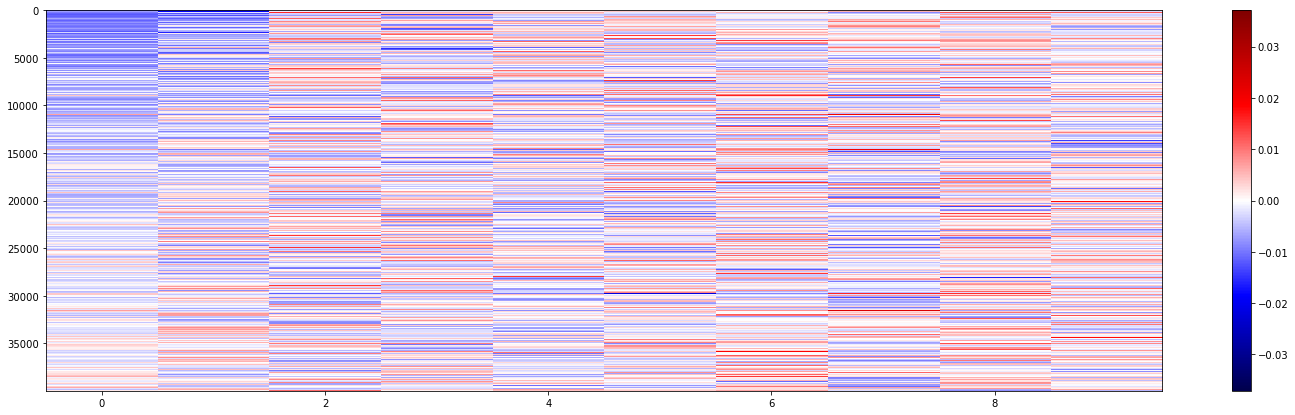

k = 0


,lowest words,lowest value,highest words,highest value
0,more,-0.016784,20003,0.010961
1,their,-0.016629,dehr,0.009749
2,some,-0.016403,vih,0.009467
3,these,-0.016345,wuh,0.009401
4,any,-0.016252,202-887-8307,0.009337
5,they,-0.016121,pehr,0.008935
6,are,-0.016031,jih,0.008719
7,have,-0.016011,kur,0.008604
8,countries,-0.016009,suhn,0.008560
9,our,-0.015971,puh,0.008187


k = 1


,lowest words,lowest value,highest words,highest value
0,minister,-0.020170,282-942,0.014928
1,former,-0.018658,http://www.nasdaq.com,0.014748
2,leader,-0.018516,herein,0.014330
3,secretary,-0.018176,microscopic,0.012979
4,president,-0.018053,hushen,0.012545
5,deputy,-0.017816,coating,0.012395
6,chief,-0.017291,droplets,0.012313
7,chairman,-0.016982,coatings,0.012299
8,told,-0.016961,polymers,0.012162
9,appointed,-0.016893,organisms,0.012157


k = 2


,lowest words,lowest value,highest words,highest value
0,mehn,-0.017850,cents,0.021018
1,yahng,-0.015797,cac-40,0.019607
2,vah,-0.015194,1/4,0.019063
3,kaht,-0.014946,km,0.018876
4,meddling,-0.014556,bushel,0.018369
5,discredit,-0.014498,gallon,0.018348
6,condone,-0.013851,3/4,0.018072
7,voh,-0.013580,stoxx,0.017351
8,radovan,-0.013159,0.9,0.017068
9,heinous,-0.013150,1/8,0.017065


k = 3


,lowest words,lowest value,highest words,highest value
0,732-390-4480,-0.018146,arbil,0.016813
1,guitar,-0.017470,pkk,0.016114
2,732-390-4697,-0.017347,kyrgyzstan,0.015388
3,funny,-0.016090,puntland,0.015374
4,vocals,-0.015931,burundian,0.015371
5,guy,-0.015845,tajik,0.015352
6,piano,-0.015843,dushanbe,0.015322
7,matt,-0.015309,nagorno,0.015242
8,andy,-0.015145,eritrean,0.015241
9,you,-0.015106,aceh,0.015068


k = 4


,lowest words,lowest value,highest words,highest value
0,nahn,-0.028982,212-556-4204,0.026478
1,vah,-0.022056,404-526-5456,0.022971
2,rih,-0.019185,202-383-7824,0.022203
3,rained,-0.018238,nonsubscribers,0.021132
4,dool,-0.017967,202-887-8316,0.018956
5,zuh,-0.017661,http://www.nyse.com,0.018863
6,nahr,-0.017617,zacks,0.018840
7,pounded,-0.017562,ieee,0.018134
8,streaked,-0.016679,peer-reviewed,0.017436
9,torrential,-0.016654,research,0.016428


k = 5


,lowest words,lowest value,highest words,highest value
0,shoh,-0.021662,located,0.018783
1,bahd,-0.020729,cemetery,0.018518
2,zah,-0.017938,noctuidae,0.018459
3,non-families,-0.017511,village,0.018049
4,1min,-0.017443,ancient,0.017851
5,yahn,-0.016328,medieval,0.017743
6,deficit,-0.016274,chapel,0.017181
7,earnings,-0.016107,parish,0.017131
8,http://www.nasdaq.com,-0.015784,temples,0.017032
9,hahr,-0.015361,47-42-17-11,0.016989


k = 6


,lowest words,lowest value,highest words,highest value
0,404-526-5456,-0.024434,rna,0.023098
1,fdch,-0.020236,uml,0.021412
2,worldsources,-0.019596,sanskrit,0.020846
3,evacuees,-0.015765,sbg,0.020463
4,uninsured,-0.015531,pah,0.020361
5,evacuate,-0.015346,vee,0.020081
6,1-732-390-4480,-0.015175,calculus,0.019947
7,20003,-0.015127,α,0.019922
8,nonessential,-0.014885,parf,0.019770
9,firefighters,-0.014612,subunit,0.019701


k = 7


,lowest words,lowest value,highest words,highest value
0,nikkei-225,-0.022536,grah,0.032980
1,225-issue,-0.020654,yuh,0.028295
2,non-swiss,-0.019327,fuh,0.027583
3,topix,-0.018118,luh,0.027355
4,cac-40,-0.017557,brah,0.026883
5,11-9,-0.016705,hahm,0.026119
6,chievo,-0.016491,jeh,0.024873
7,hungarians,-0.016242,wuh,0.024123
8,slavs,-0.015931,mahr,0.024022
9,tiebreak,-0.015881,kahr,0.023794


k = 8


,lowest words,lowest value,highest words,highest value
0,play-off,-0.018870,202-383-7824,0.028462
1,transverse,-0.018485,404-526-5456,0.021094
2,1-732-390-4480,-0.018316,sih,0.020212
3,ligament,-0.017608,ahb,0.019789
4,cruciate,-0.017201,dool,0.019742
5,20003,-0.016985,rupees,0.019402
6,igman,-0.016801,tael,0.018541
7,www.star,-0.016641,sahd,0.018118
8,rotor,-0.016566,non-families,0.018055
9,longitudinal,-0.016223,molested,0.017877


k = 9


,lowest words,lowest value,highest words,highest value
0,kaht,-0.037074,infection,0.024464
1,hushen,-0.028463,meningitis,0.024459
2,www.star,-0.027200,valea,0.024016
3,http://www.nytimes.com,-0.025506,creutzfeldt,0.023990
4,http://www.nyse.com,-0.025086,disease,0.023604
5,202-383-7824,-0.022900,infections,0.023550
6,212-556-4204,-0.022705,bacterial,0.023216
7,dehr,-0.022039,bacterium,0.023184
8,bihn,-0.021907,urinary,0.022658
9,dehl,-0.020577,diseases,0.022437


In [10]:
U_svd,W_svd = view_results("../output/40000_by_50_left_singular_vecs.csv",wordsfile,n=10,k=10)

I thought point-exponential priors might be good, but doesn't work at least for for smaller dataset: 
```
Factor doesn't significantly increase objective and won't be added.
No factors have been added. Skipping nullcheck.
```